## Installing the  Libraries

In [54]:
!pip install rdkit-pypi -qqq
!pip install chembl_webresource_client
!pip install dtreeviz

In [55]:
!pip install jupyterthemes
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style("onedork")

In [56]:
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this wil/l make a suapport vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix

from sklearn.decomposition import PCA # to perform PCA to plot the data
from rdkit import Chem
from chembl_webresource_client.new_client import new_client
from chembl_webresource_client import *
from collections import Counter
from operator import itemgetter
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
import seaborn as sns
from scipy.stats import skew
import pandas_profiling
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import pandas  as pd
from chembl_webresource_client.new_client import new_client
import time

from sklearn.metrics import plot_confusion_matrix
from dtreeviz.trees import dtreeviz

## Reading the dataset
The following dataset is taken from the Chembl for the HBB target. It consist of activities of the molecules.

In [57]:
mol_df = pd.read_csv("/content/drive/MyDrive/Biopharma/HBB_Activities.csv", delimiter = ";")

In [9]:
mol_df.head()

,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Target Name,Target Organism,Target Type,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties
0,CHEMBL1487918,NaN,0,384.27,0,3.35,SID853043,CN1CC=C2C(C#N)=C(N)C(C#N)(C#N)C(c3cccc(Cl)c3Cl...,Potency,'=',...,Hemoglobin beta chain,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,None,NaN
1,CHEMBL1527923,NaN,0,432.87,0,4.17,SID4238688,COc1cccc(Nc2ncc3nc(-c4ccc(Cl)cc4)c(=O)n(CCC#N)...,Potency,'=',...,Hemoglobin beta chain,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,None,NaN
2,CHEMBL1420184,NaN,0,357.46,0,3.46,SID7969724,CNC(=O)c1c(NC(=O)c2nc3ccccc3s2)sc2c1CCC2,Potency,'=',...,Hemoglobin beta chain,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,None,NaN
3,CHEMBL1576762,NaN,0,388.47,0,4.36,SID7974942,Cc1n[nH]c(C)c1N1C(=O)c2cccc3c(N4CCCCCC4)ccc(c2...,Potency,'=',...,Hemoglobin beta chain,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,None,NaN
4,CHEMBL1557057,NaN,0,360.37,0,2.26,SID3714646,Cc1cc(NC(=O)COC(=O)COc2cccc3c2OC(C)(C)C3)no1,Potency,'=',...,Hemoglobin beta chain,Homo sapiens,SINGLE PROTEIN,CHEMBL1201862,7,PubChem BioAssays,NaN,NaN,None,NaN


In [ ]:
len(mol_df)

1465

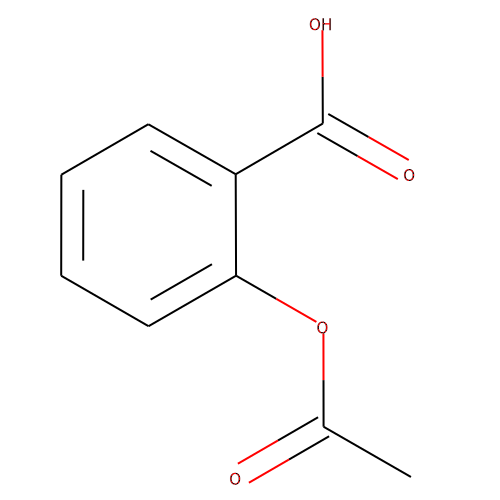

In [11]:

from chembl_webresource_client.new_client import new_client
from IPython.display import SVG

image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL25'))

## Web scrapping Basic
The fllwing code is a basic code to just send the smile structure to the website and get the whle webpage

In [12]:
from bs4 import BeautifulSoup
import urllib

post_params = {
    "smiles" : "O=C(Oc1ccccc1C(=O)O)C",
        }
post_args = urllib.parse.urlencode(post_params).encode("utf-8")
print(post_args)
url = 'http://www.swissadme.ch/index.php'
fp = urllib.request.urlopen(url, post_args)
soup = BeautifulSoup(fp)

b'smiles=O%3DC%28Oc1ccccc1C%28%3DO%29O%29C'


In [19]:
df = pd.DataFrame(columns=["Formula", "Molecular weight","Num. heavy atoms", "Num. arom. heavy atoms",
                           "Fraction Csp3", "Num. rotatable bonds", "Num. H-bond acceptors","Num. H-bond donors",
                           "Molar Refractivity"])
temp = []
flag =0 
i = 0
idx = []
for i in range(0,len(prop)):
  if not flag:
    if prop[i].text == "Physicochemical Properties":
      flag =1
    continue
  if prop[i].text in ["Physicochemical Properties", "Lipophilicity", "Water Solubility", "Pharmacokinetics", "Druglikeness", "Medicinal Chemistry"]:
    print("split"*40)
    continue
  if prop[i].a:
    #print("&&"*40)
    #print(prop[i].text)
    print(prop[i].text.split("\n")[0])
    temp.append(prop[i].text.split("\n")[0])
    continue
  print(i,  prop[i].text)
  temp.append(prop[i].text)
temp


df = pd.DataFrame(columns = temp[0::2])
df.head()  

15 Formula
16 C9H8O4
17 Molecular weight
18 180.16 g/mol
19 Num. heavy atoms
20 13
21 Num. arom. heavy atoms
22 6
23 Fraction Csp3
24 0.11
25 Num. rotatable bonds
26 3
27 Num. H-bond acceptors
28 4
29 Num. H-bond donors
30 1
31 Molar Refractivity
32 44.90
TPSA
34 63.60 &Aring&sup2
splitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplit
Log Po/w (iLOGP) 
37 1.30
Log Po/w (XLOGP3) 
39 1.19
Log Po/w (WLOGP) 
41 1.31
Log Po/w (MLOGP) 
43 1.51
Log Po/w (SILICOS-IT) 
45 1.10
Consensus Log Po/w
47 1.28
splitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplitsplit
Log S (ESOL) 
50 -1.85
51 Solubility 
52 2.54e+00 mg/ml ; 1.41e-02 mol/l 
Class 
54 Very soluble 
Log S (Ali) 
56 -2.12
57 Solubility 
58 1.36e+00 mg/ml 

,Formula,Molecular weight,Num. heavy atoms,Num. arom. heavy atoms,Fraction Csp3,Num. rotatable bonds,Num. H-bond acceptors,Num. H-bond donors,Molar Refractivity,TPSA,...,Lipinski,Ghose,Veber,Egan,Muegge,Bioavailability Score,PAINS,Brenk,Leadlikeness,Synthetic accessibility


In [20]:
df.loc[len(df)] = temp[1::2]

In [21]:
df.head()

,Formula,Molecular weight,Num. heavy atoms,Num. arom. heavy atoms,Fraction Csp3,Num. rotatable bonds,Num. H-bond acceptors,Num. H-bond donors,Molar Refractivity,TPSA,...,Lipinski,Ghose,Veber,Egan,Muegge,Bioavailability Score,PAINS,Brenk,Leadlikeness,Synthetic accessibility
0,C9H8O4,180.16 g/mol,13,6,0.11,3,4,1,44.90,63.60 &Aring&sup2,...,Yes; 0 violation,Yes,Yes,Yes,No; 1 violation: MW<200,0.85,0 alert,1 alert: phenol_ester,No; 1 violation: MW<250,1.52


## Web scrapping advanced
The following code is used to extract all the table from the webpage result, parse them and store them in the csv format.

In [26]:
from chembl_webresource_client.new_client import new_client

#df1 = pd.DataFrame()
for f,id in enumerate(mol_df["Molecule ChEMBL ID"]):
  print(f"item number: {f}")
  if 1<f <220 :
    continue
  if f%30 == 0 and f!=0:
    df1.to_csv("/content/drive/MyDrive/Biopharma/Data.csv")
    print(df1.head())
    time.sleep(60)
  try:
    molecule = new_client.molecule
    m1 = molecule.filter(chembl_id=id).only(['molecule_structures'])
    #print(id, m1[0]['molecule_structures']["canonical_smiles"])
    post_params = {
    "smiles" : m1[0]['molecule_structures']["canonical_smiles"],
        }
    post_args = urllib.parse.urlencode(post_params).encode("utf-8")
    #print(post_args)
    url = 'http://www.swissadme.ch/index.php'
    print("request sent")
    fp = urllib.request.urlopen(url, post_args)
    soup = BeautifulSoup(fp)

    prop = soup.findAll("td")
    temp = []
    flag =0 
    i = 0
    idx = []
    for i in range(0,len(prop)):
      if not flag:
          #print("skip")
          if prop[i].text == "Physicochemical Properties":
            flag = 1
            continue
      if prop[i].text in ["Physicochemical Properties", "Lipophilicity", "Water Solubility", "Pharmacokinetics", "Druglikeness", "Medicinal Chemistry"]:
        #print("split"*40)
        continue
      if prop[i].a:
        #print("&&"*40)
        #print(prop[i].text)
        #print(prop[i].text.split("\n")[0])
        temp.append(prop[i].text.split("\n")[0])
        
      #print(i,  prop[i].text)
      else:
        temp.append(prop[i].text)

      
    
    print("appending the table")
    print(len(temp[1::2]))
    if f==0:
      print("mt")
      df1 = pd.DataFrame(columns = temp[0::2])
    if len(temp[1::2]) == 51:
      df1.loc[len(df1.index)] = temp[1::2]
    print(f"Length of table {len(df1)}")
  except TypeError or ValueError:
    pass

Streaming output truncated to the last 5000 lines.
item number: 683
request sent
appending the table
0
Length of table 281
item number: 684
request sent
appending the table
0
Length of table 281
item number: 685
request sent
appending the table
0
Length of table 281
item number: 686
request sent
appending the table
0
Length of table 281
item number: 687
request sent
appending the table
0
Length of table 281
item number: 688
request sent
appending the table
0
Length of table 281
item number: 689
request sent
appending the table
0
Length of table 281
item number: 690
    BBB        PGP+                                                   SMILES  \
0        HIA         PGP—  N#CC1=C(N)C(C(C2C1=CCN(C2)C)c1cccc(c1Cl)Cl)(C#...   
1        HIA         PGP—  N#CCCn1c(=O)c(nc2c1nc(nc2)Nc1cccc(c1)OC)c1ccc(...   
2        HIA         PGP—      O=C(Nc1cc(F)cc(c1)F)Nc1ccc(cc1)OC(C(=O)O)(C)C   
3        HIA         PGP—  CC(C[C@@H](C(=O)O)NC(=O)C1(CCCC1)Oc1ccc(cc1)CC...   
4        HIA         PGP—  C

### Removing unwanted columns

In [88]:
data_df = pd.read_csv("/content/drive/MyDrive/Biopharma/Data.csv")
data_df.drop(["Unnamed: 0", "Unnamed: 1", "BBB", "Unnamed: 3", "Unnamed: 4", "PGP+", "Unnamed: 6"], axis = 1, inplace =True)
data_df.head()

,SMILES,Formula,Molecular weight,Num. heavy atoms,Num. arom. heavy atoms,Fraction Csp3,Num. rotatable bonds,Num. H-bond acceptors,Num. H-bond donors,Molar Refractivity,...,Lipinski,Ghose,Veber,Egan,Muegge,Bioavailability Score,PAINS,Brenk,Leadlikeness,Synthetic accessibility
0,N#CC1=C(N)C(C(C2C1=CCN(C2)C)c1cccc(c1Cl)Cl)(C#...,C19H15Cl2N5,384.26 g/mol,26,6,0.32,1,4,1,102.44,...,Yes; 0 violation,Yes,Yes,Yes,Yes,0.55,1 alert: cyano_ene_amine_A,0 alert,No; 1 violation: MW>350,4.10
1,N#CCCn1c(=O)c(nc2c1nc(nc2)Nc1cccc(c1)OC)c1ccc(...,C22H17ClN6O2,432.86 g/mol,31,22,0.14,6,6,1,118.70,...,Yes; 0 violation,Yes,Yes,Yes,Yes,0.55,0 alert,0 alert,No; 1 violation: MW>350,3.15
2,O=C(Nc1cc(F)cc(c1)F)Nc1ccc(cc1)OC(C(=O)O)(C)C,C17H16F2N2O4,350.32 g/mol,25,12,0.18,7,6,3,87.80,...,Yes; 0 violation,Yes,Yes,Yes,Yes,0.56,0 alert,0 alert,No; 1 violation: MW>350,2.44
3,CC(C[C@@H](C(=O)O)NC(=O)C1(CCCC1)Oc1ccc(cc1)CC...,C28H36N2O5,480.60 g/mol,35,12,0.46,12,5,3,137.24,...,Yes; 0 violation,"No; 3 violations: MW>480, MR>130, #atoms>70",No; 1 violation: Rotors>10,Yes,No; 1 violation: XLOGP3>5,0.56,0 alert,0 alert,"No; 3 violations: MW>350, Rotors>7, XLOGP3>3.5",3.91
4,CC(C[C@@H](C(=O)O)NC(=O)C1(CCCC1)Oc1ccc(cc1)CC...,C28H36N2O5,480.60 g/mol,35,12,0.46,12,5,3,137.24,...,Yes; 0 violation,"No; 3 violations: MW>480, MR>130, #atoms>70",No; 1 violation: Rotors>10,Yes,No; 1 violation: XLOGP3>5,0.56,0 alert,0 alert,"No; 3 violations: MW>350, Rotors>7, XLOGP3>3.5",3.91


In [91]:
data_df = data_df.append(pd.read_csv("/content/drive/MyDrive/Biopharma/Data_backup.csv"))

In [92]:
len(data_df)

490

## Data Preporcessing
The following codes convert the data to the right data type like from string to float ("56.6" to 56.6).  Also some columns are catagorical in nature so i converted the is binary categories

In [93]:
data_df["Molecular weight"] = data_df["Molecular weight"].str.split(" ", expand = True)[0].astype(float)

In [94]:
data_df["TPSA"] = data_df["TPSA"].str.split(" ", expand = True)[0].astype(float)

In [95]:
data_df["Lipinski_cat"] = data_df["Lipinski "].str.split(";", expand = True)[0].astype("category").cat.codes

In [96]:
data_df["Ghose_cat"] = data_df["Ghose "].str.split(";", expand = True)[0].astype("category").cat.codes

In [97]:
data_df["Veber_cat"] = data_df["Veber "].str.split(";", expand = True)[0].astype("category").cat.codes

In [98]:
data_df["Egan_cat"] = data_df["Egan "].str.split(";", expand = True)[0].astype("category").cat.codes

In [99]:
data_df["Muegge_cat"] = data_df["Muegge "].str.split(";", expand = True)[0].astype("category").cat.codes

In [100]:
data_df["Solubility "] = data_df["Solubility "].str.split(";", expand = True)[0].str.split(" ", expand = True)[0].astype(float)

In [101]:
data_df["Solubility .1"] = data_df["Solubility .1"].str.split(";", expand = True)[0].str.split(" ", expand = True)[0].astype(float)

In [102]:
data_df["Solubility .2"] = data_df["Solubility .2"].str.split(";", expand = True)[0].str.split(" ", expand = True)[0].astype(float)

In [103]:
data_df["Log Kp (skin permeation) "] = data_df["Log Kp (skin permeation) "].str.split(" ", expand = True)[0].astype(float)

In [104]:
data_df.drop(["Leadlikeness " , "Brenk ", "PAINS ", ] ,axis = 1, inplace = True )

In [106]:
data_df["Class "] = data_df["Class "].astype("category")
data_df["Class_cat"] = data_df["Class "].cat.codes

data_df["GI absorption "] = data_df["GI absorption "].astype("category")
data_df["GI absorption_cat"] = data_df["GI absorption "].cat.codes

data_df["BBB permeant_cat"] = data_df["BBB permeant "].astype("category").cat.codes
data_df["P-gp substrate_cat"] = data_df["P-gp substrate "].astype("category").cat.codes
data_df["CYP1A2 inhibitor_cat"] = data_df["CYP1A2 inhibitor "].astype("category").cat.codes
data_df["CYP2C19 inhibitor_cat"] = data_df["CYP2C19 inhibitor "].astype("category").cat.codes
data_df["CYP2C9 inhibitor_cat"] = data_df["CYP2C9 inhibitor "].astype("category").cat.codes
data_df["CYP2D6 inhibitor_cat"] = data_df["CYP2D6 inhibitor "].astype("category").cat.codes
data_df["CYP3A4 inhibitor_cat"] = data_df["CYP3A4 inhibitor "].astype("category").cat.codes
data_df["Class .1_cat"] = data_df["Class .1"].astype("category").cat.codes
data_df["Class .2_cat"] = data_df["Class .2"].astype("category").cat.codes

In [43]:
data_df.head()

,SMILES,Formula,Molecular weight,Num. heavy atoms,Num. arom. heavy atoms,Fraction Csp3,Num. rotatable bonds,Num. H-bond acceptors,Num. H-bond donors,Molar Refractivity,...,GI absorption_cat,BBB permeant_cat,P-gp substrate_cat,CYP1A2 inhibitor_cat,CYP2C19 inhibitor_cat,CYP2C9 inhibitor_cat,CYP2D6 inhibitor_cat,CYP3A4 inhibitor_cat,Class .1_cat,Class .2_cat
0,N#CC1=C(N)C(C(C2C1=CCN(C2)C)c1cccc(c1Cl)Cl)(C#...,C19H15Cl2N5,384.26,26,6,0.32,1,4,1,102.44,...,0,0,1,0,0,1,0,1,2,1
1,N#CCCn1c(=O)c(nc2c1nc(nc2)Nc1cccc(c1)OC)c1ccc(...,C22H17ClN6O2,432.86,31,22,0.14,6,6,1,118.70,...,0,0,0,1,0,1,1,1,2,2
2,O=C(Nc1cc(F)cc(c1)F)Nc1ccc(cc1)OC(C(=O)O)(C)C,C17H16F2N2O4,350.32,25,12,0.18,7,6,3,87.80,...,0,0,0,0,0,1,0,0,2,1
3,CC(C[C@@H](C(=O)O)NC(=O)C1(CCCC1)Oc1ccc(cc1)CC...,C28H36N2O5,480.60,35,12,0.46,12,5,3,137.24,...,0,0,1,0,0,1,1,1,3,2
4,CC(C[C@@H](C(=O)O)NC(=O)C1(CCCC1)Oc1ccc(cc1)CC...,C28H36N2O5,480.60,35,12,0.46,12,5,3,137.24,...,0,0,1,0,0,1,1,1,3,2


In [ ]:
data_df["Class "]

0                 Soluble 
1      Moderately soluble 
2      Moderately soluble 
3      Moderately soluble 
4                 Soluble 
              ...         
215    Moderately soluble 
216    Moderately soluble 
217    Moderately soluble 
218    Moderately soluble 
219               Soluble 
Name: Class , Length: 220, dtype: category
Categories (5, object): ['Highly soluble ', 'Moderately soluble ', 'Poorly soluble ', 'Soluble ',
                         'Very soluble ']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


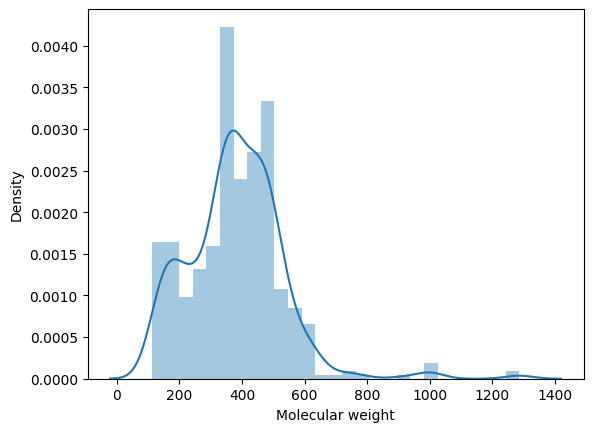

In [107]:
sns.distplot(data_df["Molecular weight"])

### These columns are catagorical in nature

In [108]:
categorical = [var for var in data_df.columns if data_df[var].dtype=='O']
categorical

['SMILES',
 'Formula',
 'Class .1',
 'Class .2',
 'BBB permeant ',
 'P-gp substrate ',
 'CYP1A2 inhibitor ',
 'CYP2C19 inhibitor ',
 'CYP2C9 inhibitor ',
 'CYP2D6 inhibitor ',
 'CYP3A4 inhibitor ',
 'Lipinski ',
 'Ghose ',
 'Veber ',
 'Egan ',
 'Muegge ',
 'Unnamed: 3',
 'Unnamed: 6']

## Extrating dependent columns 

In [109]:
X = data_df[["Molecular weight", "Num. heavy atoms", "Num. arom. heavy atoms", "Fraction Csp3", "Num. rotatable bonds", "Num. H-bond acceptors", "Num. H-bond donors", "Molar Refractivity","TPSA", "Log Po/w (iLOGP) ", "Log Po/w (XLOGP3) ","Log Po/w (WLOGP) ", "Log Po/w (MLOGP) ", "Log Po/w (SILICOS-IT) ", "Consensus Log Po/w","Class_cat", "Class .1_cat", "Class .2_cat", "Log S (ESOL) ","Log S (Ali) ", "Log S (SILICOS-IT) ", "Solubility .1", "Solubility .2","Solubility ", "Lipinski_cat", "Ghose_cat", "Veber_cat", "Egan_cat", "Muegge_cat", "Bioavailability Score "]]
X.head()

,Molecular weight,Num. heavy atoms,Num. arom. heavy atoms,Fraction Csp3,Num. rotatable bonds,Num. H-bond acceptors,Num. H-bond donors,Molar Refractivity,TPSA,Log Po/w (iLOGP),...,Log S (SILICOS-IT),Solubility .1,Solubility .2,Solubility,Lipinski_cat,Ghose_cat,Veber_cat,Egan_cat,Muegge_cat,Bioavailability Score
0,384.26,26,6,0.32,1,4,1,102.44,100.63,2.30,...,-4.93,0.029600,0.004470,0.05900,1,1,1,1,1,0.55
1,432.86,31,22,0.14,6,6,1,118.70,105.72,3.56,...,-8.28,0.002690,0.000002,0.00791,1,1,1,1,1,0.55
2,350.32,25,12,0.18,7,6,3,87.80,87.66,2.52,...,-5.42,0.021900,0.001320,0.08550,1,1,1,1,1,0.56
3,480.60,35,12,0.46,12,5,3,137.24,104.73,3.53,...,-7.71,0.000041,0.000009,0.00150,1,0,0,1,0,0.56
4,480.60,35,12,0.46,12,5,3,137.24,104.73,3.53,...,-7.71,0.000041,0.000009,0.00150,1,0,0,1,0,0.56


### Extracting Independent columns
#### Random forest Classifier for GI absorption_cat

In [110]:
y = data_df["GI absorption_cat"]


In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [112]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Model accuracy score with 10 decision-trees : 0.9932
Confusion matrix

 [[121   1]
 [  0  25]]


Confusion matrix

 [[121   1]
 [  0  25]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Confusion matrix for classifying GI absorption have accuracy of 0.9931972789115646')

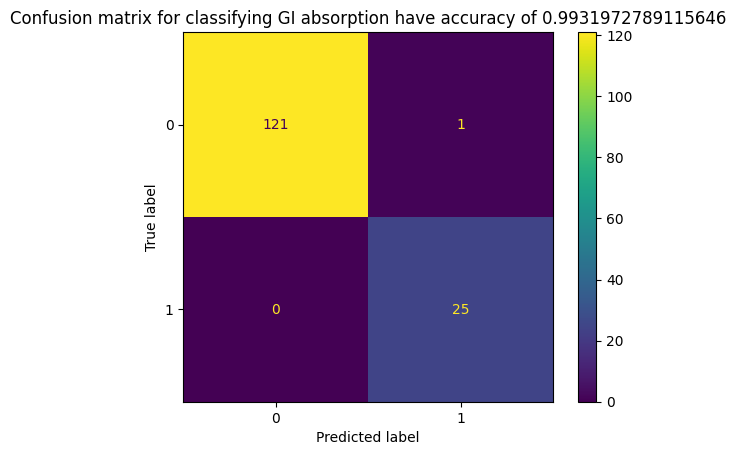

In [113]:
from sklearn.metrics import confusion_matrix
jtplot.reset()
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title(f"Confusion matrix for classifying GI absorption have accuracy of {accuracy_score(y_test, y_pred)}")

In [114]:
%cd /content/GI_absorption

/content/GI_absorption


In [115]:

for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="GI absorption",
                feature_names=X.columns,
                class_names=list(data_df["GI absorption "].unique()),
                title=f"{i}th decision tree - GI absorption")
  viz.save(f"tree_{i}.svg")

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [146]:
!mkdir ../BBB_permeant
%cd /content/BBB_permeant

/content/BBB_permeant


In [116]:
jtplot.reset()

/content/BBB_permeant
Model accuracy score with 10 decision-trees : 0.9796


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

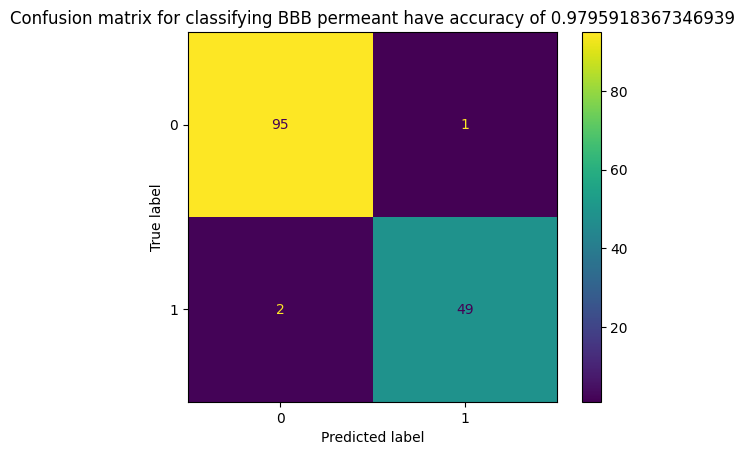

In [117]:
%cd /content/BBB_permeant
y = data_df["BBB permeant_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title(f"Confusion matrix for classifying BBB permeant have accuracy of {accuracy_score(y_test, y_pred)}")

for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="BBB permeant",
                feature_names=X.columns,
                class_names=list(data_df["BBB permeant "].unique()),
                title=f"{i}th decision tree - BBB permeant")
  viz.save(f"tree_{i}.svg")

In [153]:
!mkdir /content/P-gp_substrate
%cd /content/P-gp_substrate

/content/P-gp_substrate


/content/P-gp_substrate
Model accuracy score with 10 decision-trees : 0.8571


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

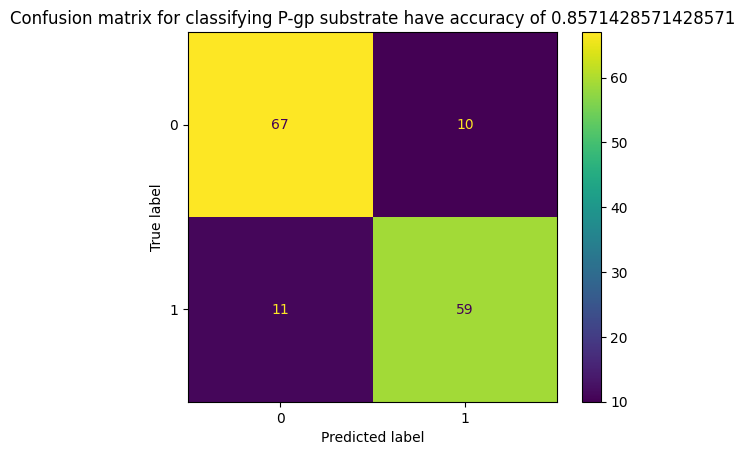

In [118]:
%cd /content/P-gp_substrate
y = data_df["P-gp substrate_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title(f"Confusion matrix for classifying P-gp substrate have accuracy of {accuracy_score(y_test, y_pred)}")
for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="P-gp substrate ",
                feature_names=X.columns,
                class_names=list(data_df["P-gp substrate "].unique()),
                title=f"{i}th decision tree - P-gp substrate")
  viz.save(f"tree_{i}.svg")

In [158]:
!mkdir /content/CYP1A2_inhibitor
%cd /content/CYP1A2_inhibitor

/content/CYP1A2_inhibitor


/content/CYP1A2_inhibitor
Model accuracy score with 10 decision-trees : 0.9116
Confusion matrix

 [[94  8]
 [ 5 40]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

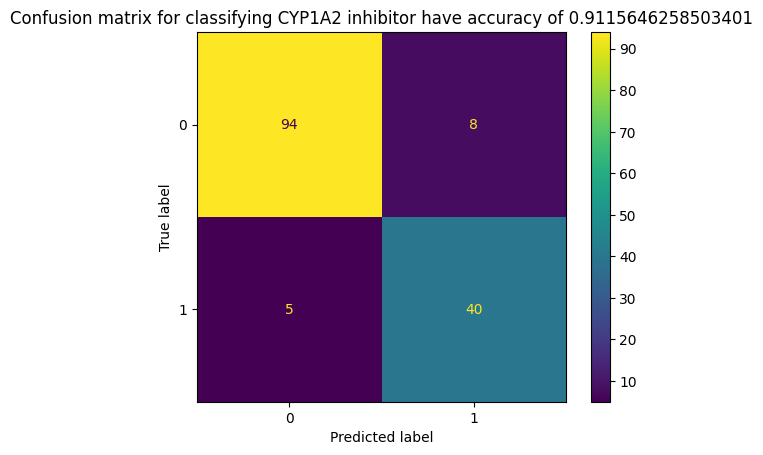

In [119]:
%cd /content/CYP1A2_inhibitor
y = data_df["CYP1A2 inhibitor_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title(f"Confusion matrix for classifying CYP1A2 inhibitor have accuracy of {accuracy_score(y_test, y_pred)}")
for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="CYP1A2 inhibitor ",
                feature_names=X.columns,
                class_names=list(data_df["CYP1A2 inhibitor "].unique()),
                title=f"{i}th decision tree - CYP1A2 inhibitor")
  viz.save(f"tree_{i}.svg")

In [1]:
!mkdir /content/CYP2C19_inhibitor
%cd /content/CYP2C19_inhibitor

mkdir: cannot create directory ‘/content/CYP2C19_inhibitor’: File exists
/content/CYP2C19_inhibitor


/content/CYP2C19_inhibitor
Model accuracy score with 10 decision-trees : 0.8980


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

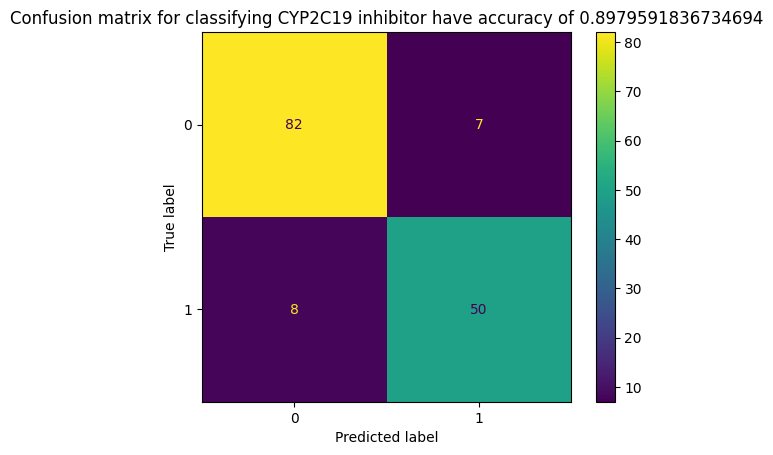

In [120]:
%cd /content/CYP2C19_inhibitor
y = data_df["CYP2C19 inhibitor_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0,n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
#print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title(f"Confusion matrix for classifying CYP2C19 inhibitor have accuracy of {accuracy_score(y_test, y_pred)}")

for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="CYP2C19 inhibitor ",
                feature_names=X.columns,
                class_names=list(data_df["CYP2C19 inhibitor "].unique()),
                title=f"{i}th decision tree - CYP2C19 inhibitor")
  viz.save(f"tree_{i}.svg")

In [84]:
!mkdir /content/CYP2C9_inhibitor
%cd /content/CYP2C9_inhibitor

/content/CYP2C9_inhibitor


[Errno 2] No such file or directory: '/content/CYP2C9 inhibitor'
/content/CYP2C9_inhibitor
Model accuracy score with 10 decision-trees : 0.8353
Confusion matrix

 [[35  8]
 [ 6 36]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

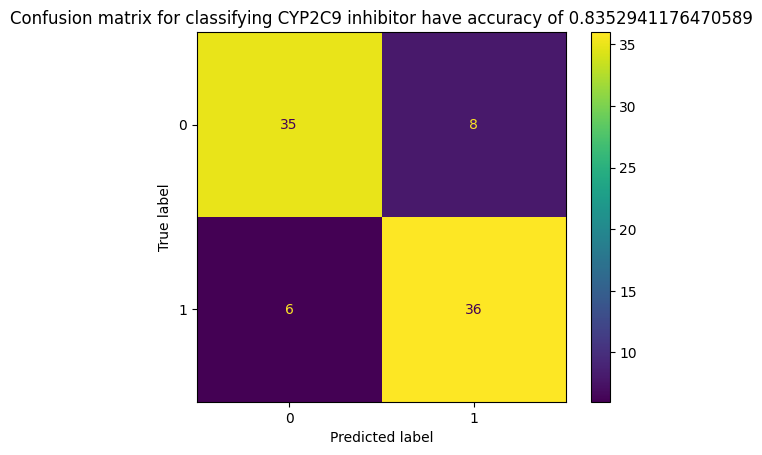

In [85]:
%cd /content/CYP2C9 inhibitor
y = data_df["CYP2C9 inhibitor_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title(f"Confusion matrix for classifying CYP2C9 inhibitor have accuracy of {accuracy_score(y_test, y_pred)}")
for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="CYP2C19 inhibitor ",
                feature_names=X.columns,
                class_names=list(data_df["CYP2C9 inhibitor "].unique()),
                title=f"{i}th decision tree - CYP2C9 inhibitor")
  viz.save(f"tree_{i}.svg")

In [4]:
!mkdir  /content/CYP2D6_inhibitor
%cd /content/CYP2D6_inhibitor

/content/CYP2D6_inhibitor


/content/CYP2D6_inhibitor
Model accuracy score with 10 decision-trees : 0.9252
Confusion matrix

 [[69  3]
 [ 8 67]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

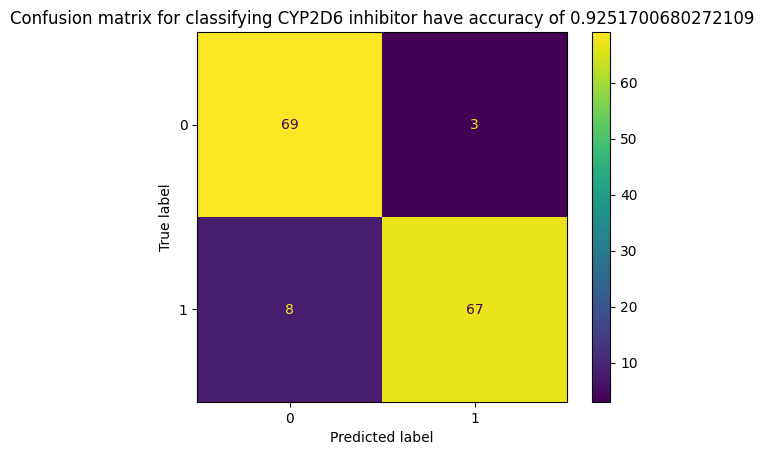

In [121]:
%cd /content/CYP2D6_inhibitor
y = data_df["CYP2D6 inhibitor_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0, n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title(f"Confusion matrix for classifying CYP2D6 inhibitor have accuracy of {accuracy_score(y_test, y_pred)}")

for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="CYP2D6 inhibitor ",
                feature_names=X.columns,
                class_names=list(data_df["CYP2D6 inhibitor "].unique()),
                title=f"{i}th decision tree - CYP2D6 inhibitor")
  viz.save(f"tree_{i}.svg")

In [72]:
!mkdir /content/CYP3A4_inhibitor

mkdir: cannot create directory ‘/content/CYP3A4_inhibitor’: File exists


/content/CYP3A4_inhibitor
Model accuracy score with 10 decision-trees : 0.9184
Confusion matrix

 [[56  6]
 [ 6 79]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


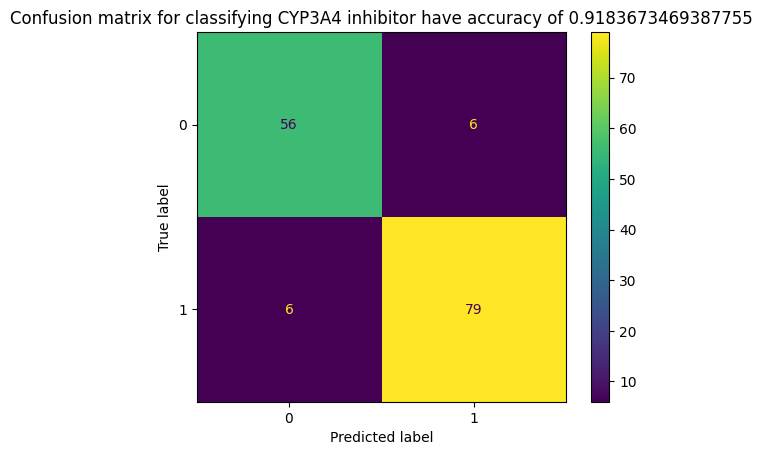

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different length

In [122]:
%cd /content/CYP3A4_inhibitor
y = data_df["CYP3A4 inhibitor_cat"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestClassifier(random_state=0,n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
plot_confusion_matrix(rfc, X_test,y_test)
plt.title("Confusion matrix for CYP3A4 inhibitor")
plt.title(f"Confusion matrix for classifying CYP3A4 inhibitor have accuracy of {accuracy_score(y_test, y_pred)}")
plt.show()
for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                target_name="CYP3A4 inhibitor ",
                feature_names=X.columns,
                class_names=list(data_df["CYP3A4 inhibitor "].unique()),
                title=f"{i}th decision tree - CYP3A4 inhibitor")
  viz.save(f"tree_{i}.svg")


In [77]:
!mkdir /content/Log_Kp

mkdir: cannot create directory ‘/content/Log_Kp’: File exists


/content/Log_Kp
Model accuracy score with 10 decision-trees : 0.9859746165068916


KeyboardInterrupt: ignored

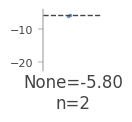

In [80]:
%cd /content/Log_Kp
y = data_df["Log Kp (skin permeation) "]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
# instantiate the classifier 
rfc = RandomForestRegressor(random_state=0, n_estimators = 10)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
score_of_model = rfc.score(X_train, y_train)
# Check accuracy score 
from sklearn.metrics import accuracy_score
print(f'Model accuracy score with 10 decision-trees : {score_of_model}')
rfc.predict(X_test)

for i in range(10):
  viz = dtreeviz(rfc.estimators_[i], X, y,
                feature_names=X.columns,
                title=f"{i}th decision tree - Log Kp (skin permeation)")
  viz.save(f"tree_{i}.svg")

In [128]:
data_df.to_csv("/content/data_df.csv")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


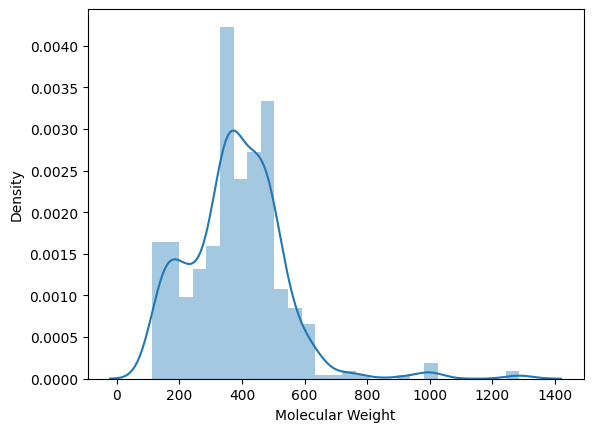

In [125]:
sns.distplot(data_df["Molecular weight"])
plt.xlabel("Molecular Weight")
plt.show()

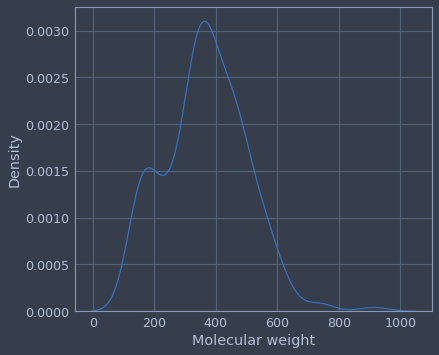

In [ ]:

sns.kdeplot(data_df["Molecular weight"], )

In [129]:
%%bash
cp -r /content/BBB_permeant /content/drive/MyDrive/Biopharma/
cp -r /content/CYP1A2_inhibitor /content/drive/MyDrive/Biopharma/
cp -r /content/CYP2C19_inhibitor /content/drive/MyDrive/Biopharma/
cp -r /content/CYP2D6_inhibitor /content/drive/MyDrive/Biopharma/
cp -r /content/CYP3A4_inhibitor /content/drive/MyDrive/Biopharma/
cp -r /content/GI_absorption /content/drive/MyDrive/Biopharma/
cp -r /content/Log_Kp /content/drive/MyDrive/Biopharma/
cp -r /content/P-gp_substrate /content/drive/MyDrive/Biopharma/
cp -r /content/CYP2C9_inhibitor /content/drive/MyDrive/Biopharma/